Iniciando experimento de rendimiento...
n = 5, Tiempo = 0.0086 segundos
n = 10, Tiempo = 0.0630 segundos
n = 15, Tiempo = 0.1281 segundos
n = 20, Tiempo = 0.1716 segundos
n = 25, Tiempo = 0.2429 segundos
n = 30, Tiempo = 0.3022 segundos
n = 35, Tiempo = 0.3439 segundos
n = 40, Tiempo = 0.3661 segundos
n = 45, Tiempo = 0.4674 segundos
n = 50, Tiempo = 0.5408 segundos
Experimento finalizado.


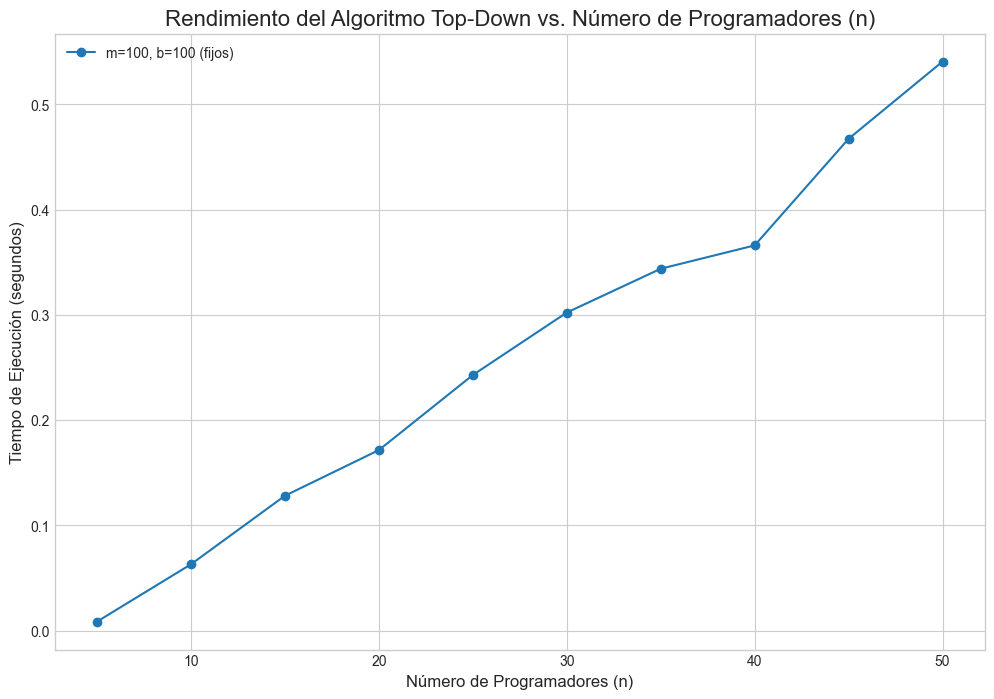

In [3]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
from functools import lru_cache

def create_solver(n, m, b, a):
    MOD = 1_000_000_007

    @lru_cache(maxsize=None)
    def contar_formas(prog_idx, lineas_restantes, bugs_restantes):
        if lineas_restantes == 0:
            return 1
        if prog_idx == n:
            return 0
        total_formas = 0
        for l in range(lineas_restantes + 1):
            costo_bugs = l * a[prog_idx]
            if costo_bugs > bugs_restantes:
                break
            formas_subproblema = contar_formas(prog_idx + 1, lineas_restantes - l, bugs_restantes - costo_bugs)
            total_formas = (total_formas + formas_subproblema) % MOD
        return total_formas

    return contar_formas(0, m, b)

# --- Parámetros del Experimento ---
n_values = range(5, 51, 5)  # n de 5 a 50, en pasos de 5
m_fixed = 100
b_fixed = 100
execution_times = []

print("Iniciando experimento de rendimiento...")
# --- Bucle de Medición ---
for n in n_values:
    # Generar tasas de error aleatorias para este 'n'
    a_random = [random.randint(1, 5) for _ in range(n)]
    
    # Medir el tiempo de ejecución
    start_time = time.perf_counter()
    # Llamamos a una función que crea el solver para limpiar la caché en cada iteración
    create_solver(n, m_fixed, b_fixed, a_random)
    end_time = time.perf_counter()
    
    duration = end_time - start_time
    execution_times.append(duration)
    print(f"n = {n}, Tiempo = {duration:.4f} segundos")

print("Experimento finalizado.")

# --- Creación del Gráfico ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(n_values, execution_times, marker='o', linestyle='-', label=f"m={m_fixed}, b={b_fixed} (fijos)")

ax.set_title("Rendimiento del Algoritmo Top-Down vs. Número de Programadores (n)", fontsize=16)
ax.set_xlabel("Número de Programadores (n)", fontsize=12)
ax.set_ylabel("Tiempo de Ejecución (segundos)", fontsize=12)
ax.legend()
ax.grid(True)

plt.show()